In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
from sklearn.metrics import roc_auc_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_standard=pd.read_csv('robust.csv')

In [4]:
df_standard=df_standard.drop(['Unnamed: 0'],axis=1)
df_standard

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,LIMIT_GP
0,2,2,1,2,2,-1,-1,-2,-2,-0.642501,...,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,1
1,2,2,2,-1,2,0,0,0,2,-0.659219,...,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,2
2,2,2,2,0,0,0,0,0,0,-0.298560,...,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0,1
3,2,2,1,0,0,0,0,0,0,-0.057491,...,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0,1
4,1,2,1,-1,0,-1,0,0,0,-0.578618,...,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,3,1,0,0,0,0,0,0,1.870379,...,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0,3
29996,1,3,2,-1,-1,-1,-1,0,0,-0.672786,...,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0,2
29997,1,2,2,4,3,2,-1,0,0,-0.647227,...,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1,1
29998,1,3,1,1,-1,0,0,0,-1,-0.717982,...,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1,1


In [5]:
df_standard

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,LIMIT_GP
0,2,2,1,2,2,-1,-1,-2,-2,-0.642501,...,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,1
1,2,2,2,-1,2,0,0,0,2,-0.659219,...,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,2
2,2,2,2,0,0,0,0,0,0,-0.298560,...,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0,1
3,2,2,1,0,0,0,0,0,0,-0.057491,...,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0,1
4,1,2,1,-1,0,-1,0,0,0,-0.578618,...,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,3,1,0,0,0,0,0,0,1.870379,...,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0,3
29996,1,3,2,-1,-1,-1,-1,0,0,-0.672786,...,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0,2
29997,1,2,2,4,3,2,-1,0,0,-0.647227,...,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1,1
29998,1,3,1,1,-1,0,0,0,-1,-0.717982,...,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1,1


In [6]:
standard_X=df_standard.drop(['default'], axis=1)
standard_Y=df_standard['default']

standard_X_train, standard_X_test, standard_Y_train, standard_Y_test = train_test_split(standard_X, standard_Y, test_size=0.3, stratify=standard_Y)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     16355
           1       0.99      0.98      0.98      4645

    accuracy                           0.99     21000
   macro avg       0.99      0.99      0.99     21000
weighted avg       0.99      0.99      0.99     21000

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.64      0.37      0.47      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.81      0.79      9000



<Axes: >

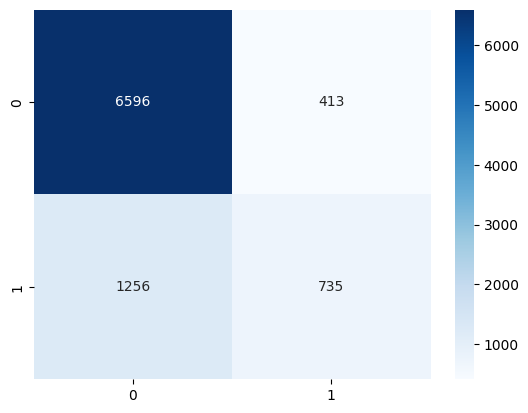

In [7]:
rfc = RandomForestClassifier(random_state=123456)
rfc.fit(standard_X_train, standard_Y_train)
y_pred_train = rfc.predict(standard_X_train)
y_pred_test = rfc.predict(standard_X_test)

from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(standard_X_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(standard_X_test)[:, 1]
roc_score_train_orginal = roc_auc_score(standard_Y_train, y_pred_train_proba)
roc_score_test_orginal = roc_auc_score(standard_Y_test, y_pred_test_proba)

print(classification_report(standard_Y_train, y_pred_train))
print(classification_report(standard_Y_test, y_pred_test))

cm1=pd.DataFrame(confusion_matrix(standard_Y_test, y_pred_test))
sns.heatmap(cm1, annot=True, cmap='Blues',fmt='g')

In [13]:
# 오버 샘플링을 통한 시각화
from imblearn.over_sampling import SMOTE
standard_X2_train, standard_X2_test, standard_Y2_train, standard_Y2_test = train_test_split(standard_X, standard_Y, test_size=0.3,shuffle=True, stratify=standard_Y, random_state=42)
sm = SMOTE(random_state = 42)
standard_X2_train, standard_Y2_train = sm.fit_resample(standard_X2_train, standard_Y2_train.ravel())

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     16355
           1       0.99      1.00      0.99     16355

    accuracy                           0.99     32710
   macro avg       0.99      0.99      0.99     32710
weighted avg       0.99      0.99      0.99     32710

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      7009
           1       0.51      0.50      0.51      1991

    accuracy                           0.78      9000
   macro avg       0.68      0.68      0.68      9000
weighted avg       0.78      0.78      0.78      9000



<Axes: >

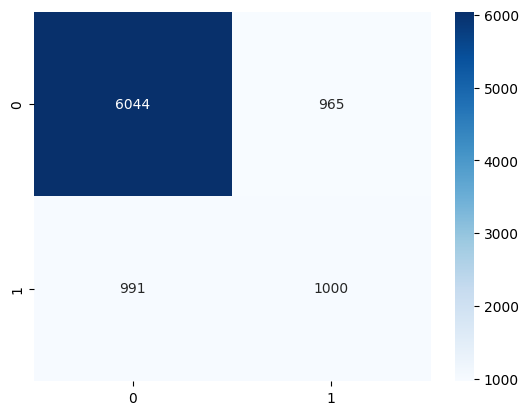

In [15]:
rfc = RandomForestClassifier(random_state=123456)
rfc.fit(standard_X2_train, standard_Y2_train)
y2_pred_train = rfc.predict(standard_X2_train)
y2_pred_test = rfc.predict(standard_X2_test)

print(classification_report(standard_Y2_train, y2_pred_train))
print(classification_report(standard_Y2_test, y2_pred_test))
cm2=pd.DataFrame(confusion_matrix(standard_Y2_test, y2_pred_test))
sns.heatmap(cm2, annot=True, cmap='Blues',fmt='g')

              precision    recall  f1-score   support

           0       0.68      0.84      0.75     16355
           1       0.79      0.61      0.69     16355

    accuracy                           0.73     32710
   macro avg       0.74      0.73      0.72     32710
weighted avg       0.74      0.73      0.72     32710

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      7009
           1       0.49      0.56      0.53      1991

    accuracy                           0.78      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.79      0.78      0.78      9000



<Axes: >

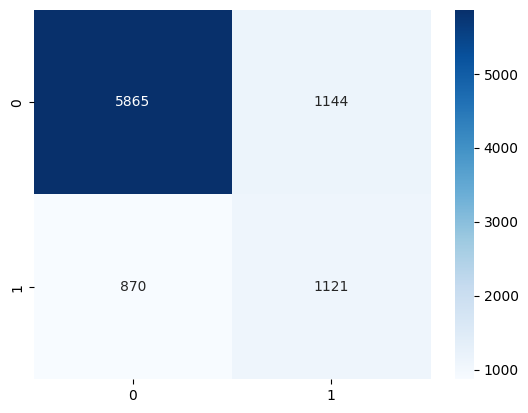

In [16]:
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(standard_X2_train, standard_Y2_train)
# Predicting the Test set results
y2_pred_train = scv.predict(standard_X2_train)
y2_pred_test = scv.predict(standard_X2_test)

print(classification_report(standard_Y2_train, y2_pred_train))
print(classification_report(standard_Y2_test, y2_pred_test))
cm2=pd.DataFrame(confusion_matrix(standard_Y2_test, y2_pred_test))
sns.heatmap(cm2, annot=True, cmap='Blues',fmt='g')

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     16355
           1       0.85      0.87      0.86     16355

    accuracy                           0.86     32710
   macro avg       0.86      0.86      0.86     32710
weighted avg       0.86      0.86      0.86     32710

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      7009
           1       0.39      0.56      0.46      1991

    accuracy                           0.71      9000
   macro avg       0.62      0.65      0.63      9000
weighted avg       0.75      0.71      0.72      9000



<Axes: >

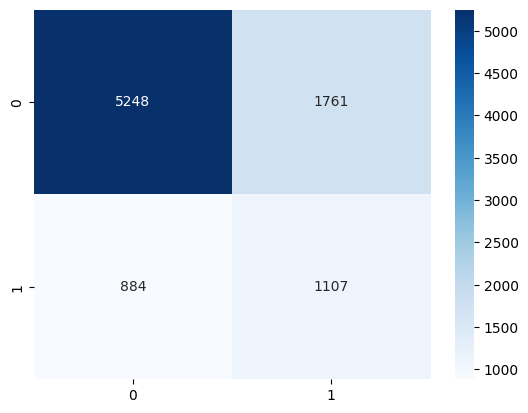

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# MLP 모델 생성 및 훈련
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)
mlp.fit(standard_X2_train, standard_Y2_train)

y2_pred_train = mlp.predict(standard_X2_train)
y2_pred_test = mlp.predict(standard_X2_test)
# 모델 평가
print(classification_report(standard_Y2_train, y2_pred_train))
print(classification_report(standard_Y2_test, y2_pred_test))
cm2=pd.DataFrame(confusion_matrix(standard_Y2_test, y2_pred_test))
sns.heatmap(cm2, annot=True, cmap='Blues',fmt='g')

In [12]:
# gridsearch 를 활용한 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

#
params = { 'n_estimators' : [100,200,300,400, 500],
           'max_depth' : [5,6, 8, 10, 12]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 123456, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1, scoring='precision')
grid_cv.fit(standard_X_train, standard_Y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

KeyboardInterrupt: ignored

In [ ]:
rfc = RandomForestClassifier(n_estimators=400, max_depth=5,random_state=123456)
rfc.fit(standard_X_train, standard_Y_train)
y_pred_train = rfc.predict(standard_X_train)
y_pred_test = rfc.predict(standard_X_test)

print(classification_report(standard_Y_train, y_pred_train))
print(classification_report(standard_Y_test, y_pred_test))
cm1=pd.DataFrame(confusion_matrix(standard_Y_test, y_pred_test))
sns.heatmap(cm1, annot=True, cmap='Blues',fmt='g')

In [ ]:
rfc = RandomForestClassifier(n_estimators=400, max_depth=5,random_state=123456)
rfc.fit(standard_X2_train, standard_Y2_train)
y2_pred_train = rfc.predict(standard_X2_train)
y2_pred_test = rfc.predict(standard_X2_test)

print(classification_report(standard_Y2_train, y2_pred_train))
print(classification_report(standard_Y2_test, y2_pred_test))
cm2=pd.DataFrame(confusion_matrix(standard_Y2_test, y2_pred_test))
sns.heatmap(cm2, annot=True, cmap='Blues',fmt='g')